In [8]:
import os
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

audio_fpath = "te/Energetic-Drink.wav"





Loads and decodes the audio as a time series y, represented as a one-dimensional NumPy floating point array.  sr is the sampling rate of y(number of samples per second).

In [10]:
y, sr = librosa.load(audio_fpath)


Creating a visual way of representing the signal loudness (spectrogram). 

In [11]:
D = librosa.stft(y)

In [12]:
import numpy as np
spectrogram = librosa.amplitude_to_db(abs(D), ref=np.max)




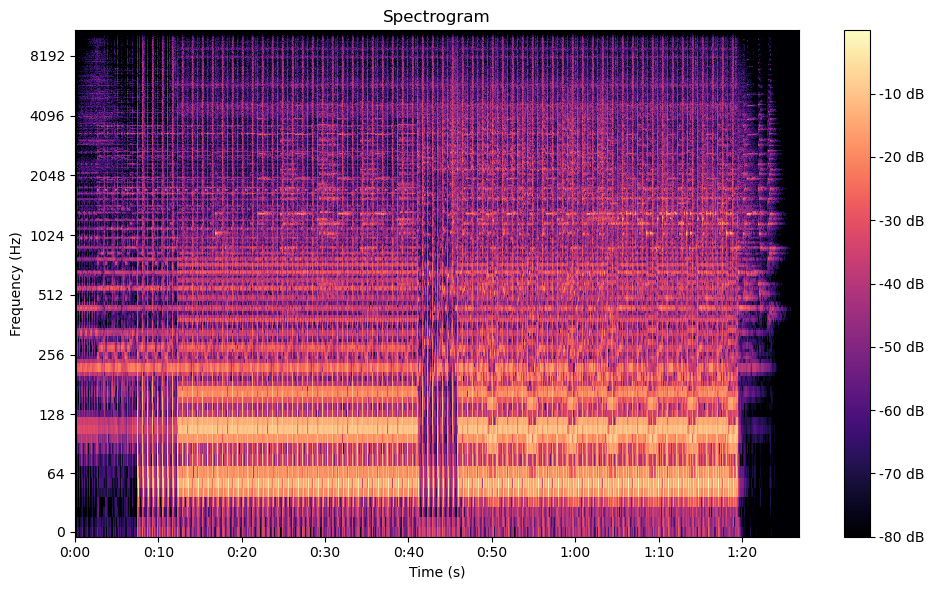

In [13]:
# Display the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(spectrogram, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()



In [15]:
print(type(y), type(sr))


<class 'numpy.ndarray'> <class 'int'>


Resample from 22KHz (default) to 45.6KHz

In [16]:
librosa.load(audio_fpath, sr=45600)

(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 45600)

Playing the audio. 

In [17]:
import IPython
IPython.display.Audio(y, rate=sr)

Raw Wave plot.

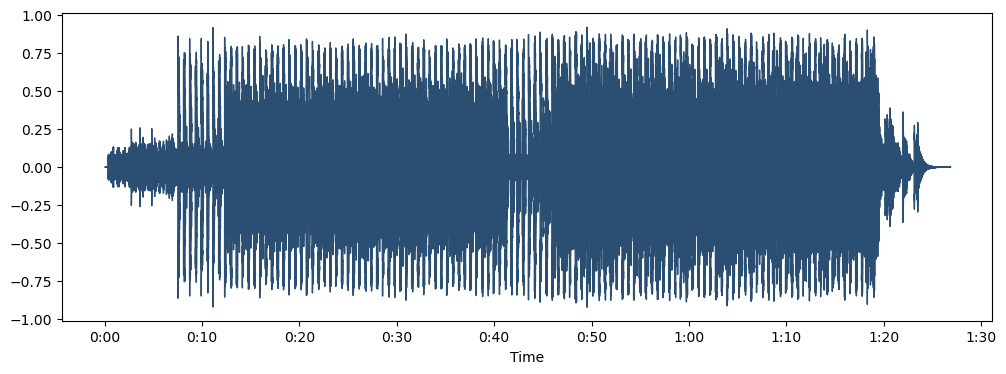

In [19]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, color = "#2B4F72")
plt.show()

Normelaize spectra

C:\Users\moren\AppData\Local\Temp\ipykernel_11468\2580748751.py:2: FutureWarning: Pass y=[0.01 0.01 0.01 ... 0.01 0.01 0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr)[0]


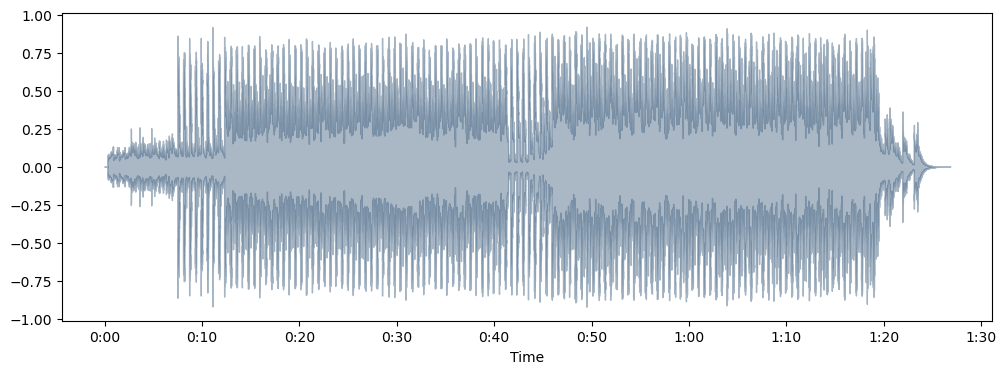

In [21]:
from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.4, color = "#2B4F72")

Zooming on the wave.

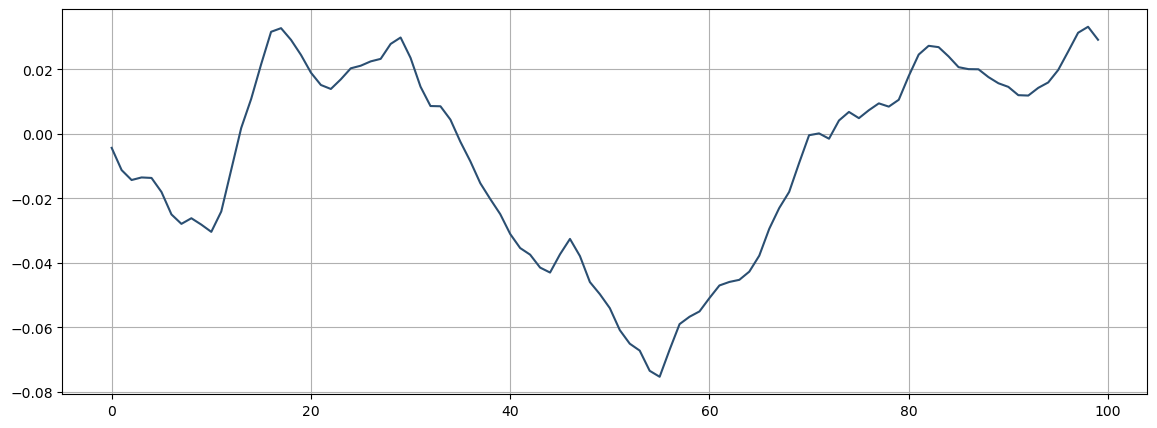

In [22]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(y[n0:n1], color="#2B4F72")
plt.grid()

Calculate the Zero-crossing rate (the rate or number at which zero crossings occur).

In [23]:
zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
print("The number of zero-crossings is :",sum(zero_crossings))

The number of zero-crossings is : 5


chroma features can capture harmonic and melodic characteristics of music, and thereby it's a powerful tool for analyzing music.

C:\Users\moren\AppData\Local\Temp\ipykernel_11468\2454330155.py:1: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = librosa.feature.chroma_stft(y, sr=sr)


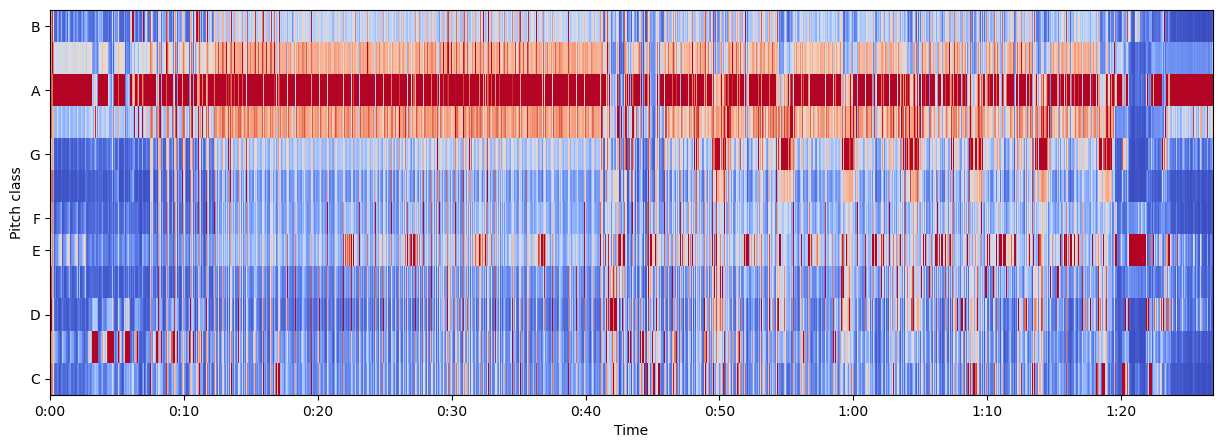

In [24]:
chromagram = librosa.feature.chroma_stft(y, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')